<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.104016,73.548086,92.945325,1.762847,260.360274,252.763269,7.597005
1,0.0,1.0,83.118363,35.475907,33.857412,-10.568065,151.883617,161.965477,-10.081860
2,0.0,2.0,33.712638,93.705424,55.613788,-10.722643,182.309208,190.557753,-8.248545
3,0.0,3.0,53.200670,87.252086,42.162041,-11.715283,180.899514,189.473757,-8.574243
4,0.0,4.0,42.706185,71.618722,73.419907,-11.492983,186.251830,196.095329,-9.843499
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.845199,94.892406,38.341774,-0.152580,179.926800,179.518048,0.408752
59996,999.0,56.0,57.059002,39.229541,20.270239,-2.153716,124.405066,124.374573,0.030494
59997,999.0,57.0,47.457648,64.052255,63.466863,-15.418689,169.558077,181.652546,-12.094469
59998,999.0,58.0,60.389822,22.138547,50.416442,1.124921,144.069731,138.087285,5.982447


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.104016,73.548086,92.945325,1.762847,260.360274,252.763269,7.597005
1,0.0,1.0,83.118363,35.475907,33.857412,-10.568065,151.883617,161.965477,-10.081860
2,0.0,2.0,33.712638,93.705424,55.613788,-10.722643,182.309208,190.557753,-8.248545
3,0.0,3.0,53.200670,87.252086,42.162041,-11.715283,180.899514,189.473757,-8.574243
4,0.0,4.0,42.706185,71.618722,73.419907,-11.492983,186.251830,196.095329,-9.843499
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.845199,94.892406,38.341774,-0.152580,179.926800,179.518048,0.408752
59996,999.0,56.0,57.059002,39.229541,20.270239,-2.153716,124.405066,124.374573,0.030494
59997,999.0,57.0,47.457648,64.052255,63.466863,-15.418689,169.558077,181.652546,-12.094469
59998,999.0,58.0,60.389822,22.138547,50.416442,1.124921,144.069731,138.087285,5.982447


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    82.104016  73.548086  92.945325   1.762847  260.360274   
      1.0    83.118363  35.475907  33.857412 -10.568065  151.883617   
      2.0    33.712638  93.705424  55.613788 -10.722643  182.309208   
      3.0    53.200670  87.252086  42.162041 -11.715283  180.899514   
      4.0    42.706185  71.618722  73.419907 -11.492983  186.251830   
...                ...        ...        ...        ...         ...   
999.0 55.0   36.845199  94.892406  38.341774  -0.152580  179.926800   
      56.0   57.059002  39.229541  20.270239  -2.153716  124.405066   
      57.0   47.457648  64.052255  63.466863 -15.418689  169.558077   
      58.0   60.389822  22.138547  50.416442   1.124921  144.069731   
      59.0   33.993998  94.878781  52.655892  14.879880  206.408550   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    252.763269   7.597005  
      1.0    161.965477 -10.081860  
      2.0    190.557753  -8.248545  
      3.0    189.473757  -8.574243  
      4.0    196.095329  -9.843499  
...                 ...        ...  
999.0 55.0   179.518048   0.408752  
      56.0   124.374573   0.030494  
      57.0   181.652546 -12.094469  
      58.0   138.087285   5.982447  
      59.0   189.884019  16.524531  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    82.104016  73.548086  92.945325   1.762847  260.360274   
      1.0    83.118363  35.475907  33.857412 -10.568065  151.883617   
      2.0    33.712638  93.705424  55.613788 -10.722643  182.309208   
      3.0    53.200670  87.252086  42.162041 -11.715283  180.899514   
      4.0    42.706185  71.618722  73.419907 -11.492983  186.251830   
...                ...        ...        ...        ...         ...   
999.0 55.0   36.845199  94.892406  38.341774  -0.152580  179.926800   
      56.0   57.059002  39.229541  20.270239  -2.153716  124.405066   
      57.0   47.457648  64.052255  63.466863 -15.418689  169.558077   
      58.0   60.389822  22.138547  50.416442   1.124921  144.069731   
      59.0   33.993998  94.878781  52.655892  14.879880  206.408550   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    252.763269   7.597005  
      1.0    161.965477 -10.081860  
      2.0    190.557753  -8.248545  
      3.0    189.473757  -8.574243  
      4.0    196.095329  -9.843499  
...                 ...        ...  
999.0 55.0   179.518048   0.408752  
      56.0   124.374573   0.030494  
      57.0   181.652546 -12.094469  
      58.0   138.087285   5.982447  
      59.0   189.884019  16.524531  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.104016,73.548086,92.945325,1.762847,260.360274,252.763269,7.597005
1,0.0,1.0,83.118363,35.475907,33.857412,-10.568065,151.883617,161.965477,-10.081860
2,0.0,2.0,33.712638,93.705424,55.613788,-10.722643,182.309208,190.557753,-8.248545
3,0.0,3.0,53.200670,87.252086,42.162041,-11.715283,180.899514,189.473757,-8.574243
4,0.0,4.0,42.706185,71.618722,73.419907,-11.492983,186.251830,196.095329,-9.843499
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.845199,94.892406,38.341774,-0.152580,179.926800,179.518048,0.408752
59996,999.0,56.0,57.059002,39.229541,20.270239,-2.153716,124.405066,124.374573,0.030494
59997,999.0,57.0,47.457648,64.052255,63.466863,-15.418689,169.558077,181.652546,-12.094469
59998,999.0,58.0,60.389822,22.138547,50.416442,1.124921,144.069731,138.087285,5.982447


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    82.104016  73.548086  92.945325   1.762847  260.360274   
      1.0    83.118363  35.475907  33.857412 -10.568065  151.883617   
      2.0    33.712638  93.705424  55.613788 -10.722643  182.309208   
      3.0    53.200670  87.252086  42.162041 -11.715283  180.899514   
      4.0    42.706185  71.618722  73.419907 -11.492983  186.251830   
...                ...        ...        ...        ...         ...   
999.0 55.0   36.845199  94.892406  38.341774  -0.152580  179.926800   
      56.0   57.059002  39.229541  20.270239  -2.153716  124.405066   
      57.0   47.457648  64.052255  63.466863 -15.418689  169.558077   
      58.0   60.389822  22.138547  50.416442   1.124921  144.069731   
      59.0   33.993998  94.878781  52.655892  14.879880  206.408550   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    252.763269   7.597005  
      1.0    161.965477 -10.081860  
      2.0    190.557753  -8.248545  
      3.0    189.473757  -8.574243  
      4.0    196.095329  -9.843499  
...                 ...        ...  
999.0 55.0   179.518048   0.408752  
      56.0   124.374573   0.030494  
      57.0   181.652546 -12.094469  
      58.0   138.087285   5.982447  
      59.0   189.884019  16.524531  

[60000 rows x 7 columns]

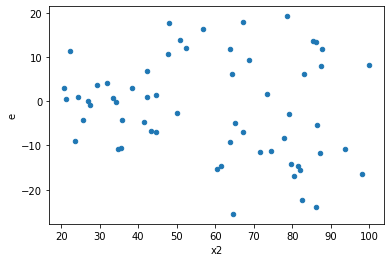

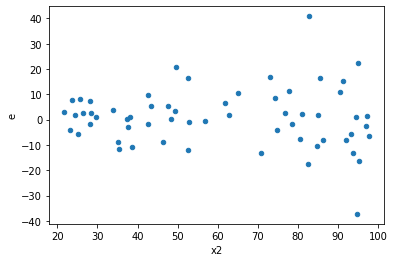

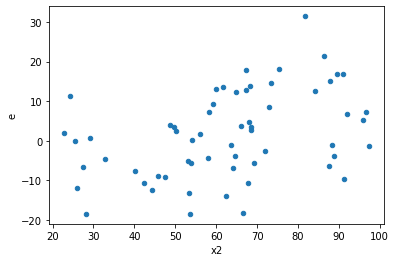

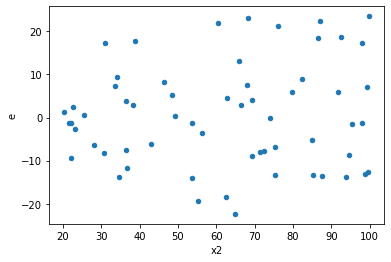

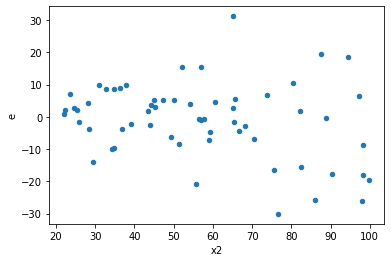

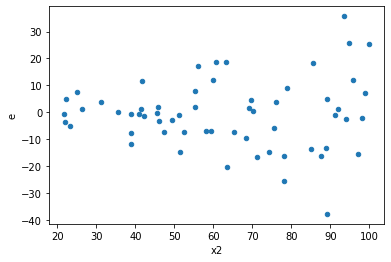

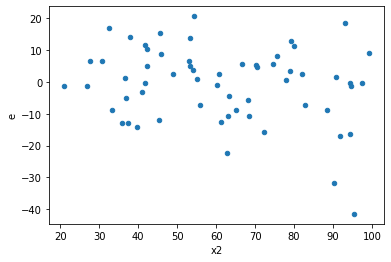

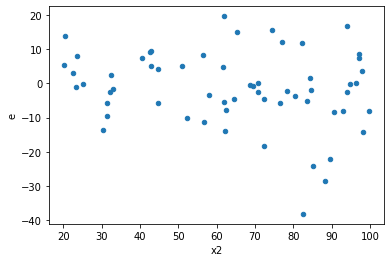

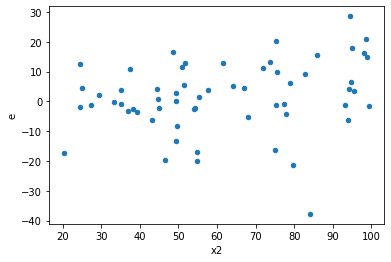

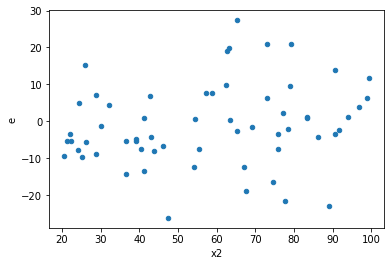

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,1738.1394814442708,3525.282773562525,82.76854673544146,167.87060826488215,2.028193255602977,0.11294892062926865,0.9435255396853657,0.05647446031463432,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,705.9119370274295,3756.6328398273176,33.61485414416331,178.88727808701512,5.321673487554789,0.00032285295484002496,0.99983857352258,0.00016142647742001248,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,1819.4562102359953,2361.52887109259,86.64077191599978,112.45375576631382,1.2979311388792834,0.5554512944707595,0.7222743527646203,0.27772564723537974,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,2267.572757165248,3288.923400360425,107.97965510310704,156.6154000171631,1.4504158201618167,0.40115539924404064,0.7994223003779797,0.20057769962202032,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,2386.7527790612653,4166.797085317635,113.65489424101263,198.41890882464926,1.7458017109574622,0.20994740423990677,0.8950262978800466,0.10497370211995338,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,1113.7050831625488,5250.86880917117,53.0335753886928,250.04137186529383,4.71477493328886,0.0007865580939185879,0.9996067209530407,0.00039327904695929394,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,1702.3219077307704,3381.315147252745,81.06294798717954,161.01500701203548,1.9862959713419344,0.1237629104748823,0.9381185447625588,0.06188145523744115,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,1669.3472006755098,3828.592890980276,79.49272384169095,182.31394718953695,2.293467104644867,0.0637744622009302,0.9681127688995349,0.0318872311004651,Reject001=1 : Homoscedasticity
9.0,21.0,21.0,2465.829862554053,3005.877163586978,117.42046964543108,143.13700778985609,1.2190123938533033,0.6541244161407826,0.6729377919296087,0.3270622080703913,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1738.1394814442708,3525.282773562525,82.76854673544146,167.87060826488215,2.028193255602977,0.11294892062926865,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,705.9119370274295,3756.6328398273176,33.61485414416331,178.88727808701512,5.321673487554789,0.00032285295484002496,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,1819.4562102359953,2361.52887109259,86.64077191599978,112.45375576631382,1.2979311388792834,0.5554512944707595,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,2267.572757165248,3288.923400360425,107.97965510310704,156.6154000171631,1.4504158201618167,0.40115539924404064,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,2386.7527790612653,4166.797085317635,113.65489424101263,198.41890882464926,1.7458017109574622,0.20994740423990677,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,1113.7050831625488,5250.86880917117,53.0335753886928,250.04137186529383,4.71477493328886,0.0007865580939185879,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,3897.5023150452816,2676.871147311025,185.5953483354896,127.47005463385834,0.6868170769206906,0.39634150569785276,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,1702.3219077307704,3381.315147252745,81.06294798717954,161.01500701203548,1.9862959713419344,0.1237629104748823,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,1669.3472006755098,3828.592890980276,79.49272384169095,182.31394718953695,2.293467104644867,0.0637744622009302,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      909
Reject001=0 : Heteroscedasticity     91
Name: Result_test, dtype: int64